In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json
import datetime

In [2]:
matplotlib.style.use('ggplot')

In [3]:
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [4]:
with open('sleep/2017-03-12') as f:
    sample_data = json.loads(f.read())
list(sample_data.keys())

['summary', 'sleep']

In [5]:
list(sample_data['summary'].keys())

['totalTimeInBed', 'totalSleepRecords', 'totalMinutesAsleep']

In [6]:
list(sample_data['sleep'][0].keys())

['restlessDuration',
 'timeInBed',
 'minutesAsleep',
 'logId',
 'efficiency',
 'restlessCount',
 'startTime',
 'awakeCount',
 'awakeningsCount',
 'minutesAwake',
 'minutesToFallAsleep',
 'minutesAfterWakeup',
 'duration',
 'dateOfSleep',
 'awakeDuration',
 'isMainSleep',
 'minuteData']

In [7]:
dates = pd.date_range('2017-03-12','2017-03-24')
time_in_bed = []
sleep_time = []

In [8]:
!pwd

/Users/withGod/Desktop/ds/fitbit


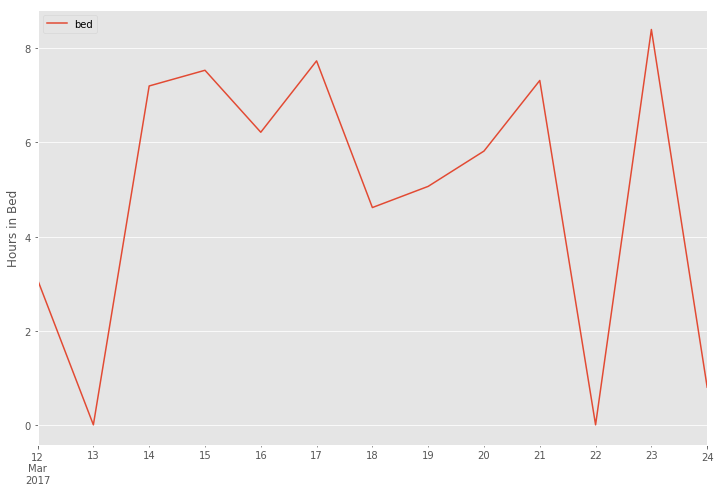

In [9]:
dir_name = './sleep/'
for date in dates:
    fname = dir_name+str(date.year)+'-'+str(date.month).zfill(2)+'-'+str(date.day).zfill(2)
    with open(fname) as f:
        date_data = json.loads(f.read())
        time_in_bed.append(date_data['summary']['totalTimeInBed']/60.0)
df = pd.DataFrame(time_in_bed,index=dates)
df.columns=['bed']
df.plot()
plt.ylabel('Hours in Bed')

In [10]:
df = df.drop(df.index[df.bed == 0.0])

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bed,11.0,5.798485,2.285929,0.8,4.841667,6.216667,7.425,8.4


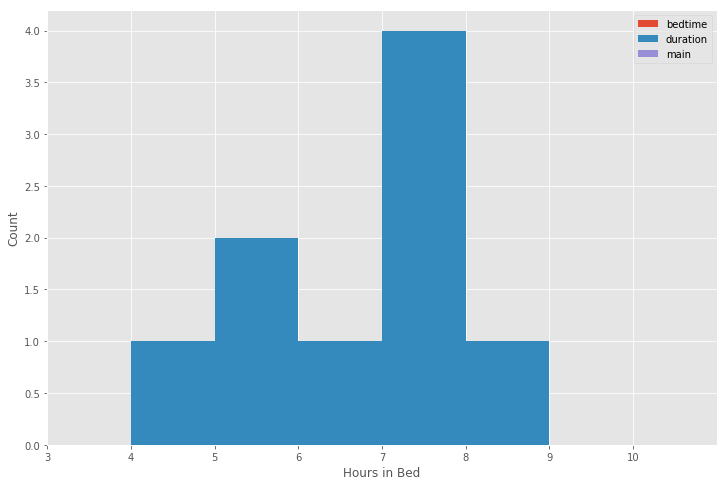

In [19]:
df.plot.hist(bins = 8, range = (3, 11))
plt.xlim(3, 11)
plt.xticks(range(3, 11))
plt.xlabel('Hours in Bed')
plt.ylabel('Count');

In [13]:
df['day_of_week'] = df.index.weekday
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df.head()

,bed,day_of_week,day_type
2017-03-12,3.083333,6,Weekend
2017-03-14,7.200000,1,Weekday
2017-03-15,7.533333,2,Weekday
2017-03-16,6.216667,3,Weekday
2017-03-17,7.733333,4,Weekday


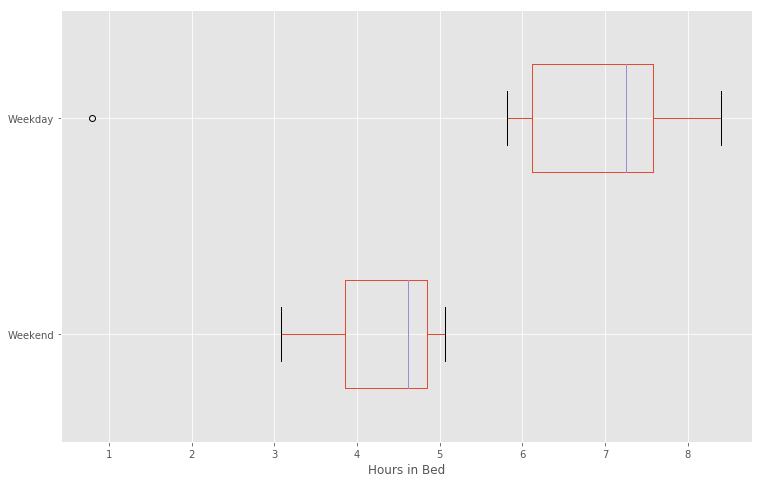

In [14]:
df.boxplot(column = 'bed', by = 'day_type', positions = [2, 1], 
           vert = False, widths = 0.5)
plt.xlabel('Hours in Bed')
plt.suptitle('')
plt.title('')

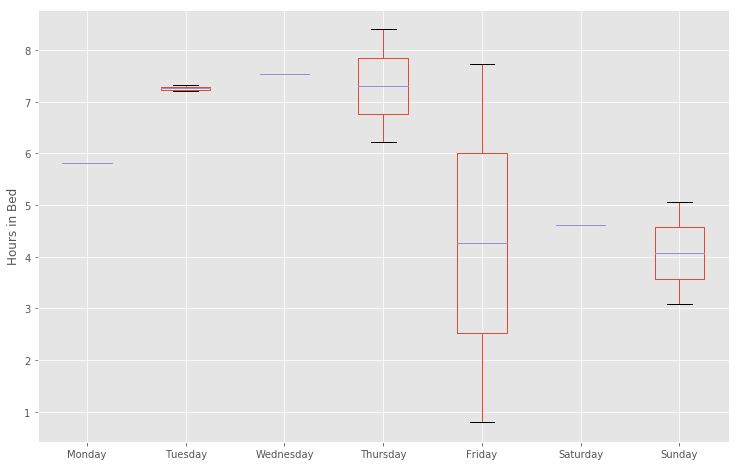

In [15]:
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 
        5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].apply(lambda x: days[x])

df.boxplot(column = 'bed', by = 'day_name', positions = [5, 1, 6, 7, 4, 2, 3])

# Configure title and axes
plt.suptitle('')
plt.title('')
plt.ylabel('Hours in Bed')
plt.xlabel('')

In [17]:
bedtimes = []

dir_name = './sleep/'
for date in dates:
    fname = dir_name+str(date.year)+'-'+str(date.month).zfill(2)+'-'+str(date.day).zfill(2)
    with open(fname) as f:
        date_data = json.loads(f.read())
        
        for sleep_event in date_data['sleep']:
            bedtimes.append((pd.to_datetime(sleep_event['startTime'][11:16]), 
                             sleep_event['timeInBed'] / 60.0,
                             sleep_event['isMainSleep']))
            
# Convert to dataframe, and make 'bedtime' a float (e.g., 5:30 -> 5.5)
df = pd.DataFrame(bedtimes, columns = ['bedtime', 'duration', 'main'])
df['bedtime'] = df['bedtime'].dt.hour + df['bedtime'].dt.minute / 60.0

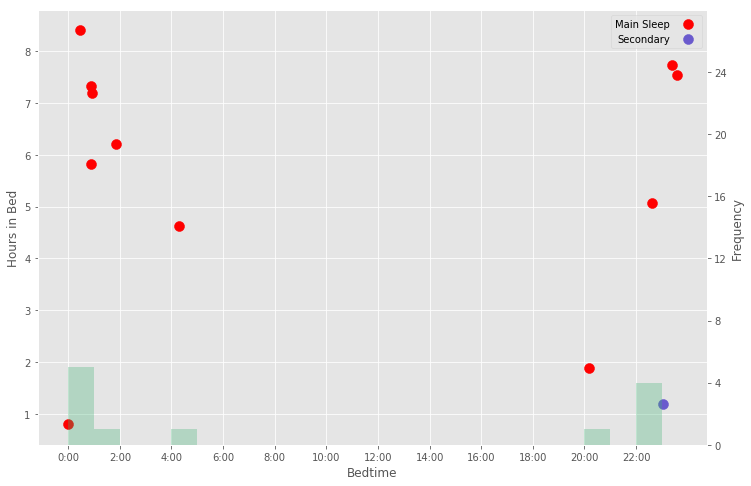

In [18]:
# Make first plot: scatterplot of bedtime vs. duration, colored by main sleep
ax = df[df.main == True].plot.scatter(x = 'bedtime', y = 'duration', 
                                      color = 'Red', s = 100, 
                                      label = 'Main Sleep')

df[df.main == False].plot.scatter(x = 'bedtime', y = 'duration', 
                                  color = 'SlateBlue', ax = ax, s = 100, 
                                  label = 'Secondary')

# List of times to use for labels
times = [str(2 * h) + ':00' for h in range(12)]

# Configure legend, x-axis, labels
plt.legend(scatterpoints = 1, markerfirst = False)
plt.xticks(range(0, 24, 2), times)
plt.xlim(0, 24)
plt.xlabel('Bedtime')
plt.ylabel('Hours in Bed');

# Overlay a histogram of bedtimes on the same plot, using a secondary y-axis
ax2 = ax.twinx()
df['bedtime'].map(lambda x: int(x)).plot.hist(bins = range(24), 
                                              color = 'MediumSeaGreen', 
                                              alpha = 0.3, grid = False)

# Configure secondary y-axis
plt.yticks(range(0, 28, 4))
plt.ylim(0, 28);